# НИС «Основы анализа данных в Python»

*Алла Тамбовцева*

## Практикум 2*. Фильтрация за рамками датафрейма: работа с индексами

В файле `Online Retail.csv` (источник – [Kaggle](https://www.kaggle.com/datasets/mysarahmadbhat/customersegmentation), хранятся данные по транзакциям покупателей, преимущественно оптовых, одного крупного сувернирного онлайн-маркета, зарегистрированного в Великобритании):
    
* `InvoiceNo`: номер транзакции;
* `StockCode`: код товара;
* `Description`: описание товара;
* `Quantity`: сколько единиц товара куплено;
* `InvoiceDate`: дата и время транзакции;
* `UnitPrice`: цена товара;
* `CustomerID`: ID покупателя;
* `Country`: страна проживания покупателя.

Файл относительно большой (45 Мб), на Github не грузится, скачать можно [здесь](https://disk.yandex.ru/i/UD-R8OKtEfyaSg).

Загрузим эти данные и удалим строки с пропущенными значениями:

In [1]:
import pandas as pd

In [2]:
sales = pd.read_csv("Online Retail.csv")
sales.dropna(inplace = True)
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Предположим, что для дальнейшей визуализации – построения столбиковой диаграммы – нам нужна таблица частот для столбца `Country`. Воспользуемся методом `.value_counts()`:

In [3]:
tab = sales["Country"].value_counts()
print(tab)

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

Полученная таблица – объект типа `pandas Series`,  последовательность Pandas, которая состоит из текстовых индексов (названия стран) и числовых значений (число покупок):

In [4]:
# атрибут .index – тип Pandas Index
# атрибут .values – тип NumPy array

print(tab.index)
print(tab.values)

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain', 'Netherlands',
       'Belgium', 'Switzerland', 'Portugal', 'Australia', 'Norway', 'Italy',
       'Channel Islands', 'Finland', 'Cyprus', 'Sweden', 'Austria', 'Denmark',
       'Japan', 'Poland', 'USA', 'Israel', 'Unspecified', 'Singapore',
       'Iceland', 'Canada', 'Greece', 'Malta', 'United Arab Emirates',
       'European Community', 'RSA', 'Lebanon', 'Lithuania', 'Brazil',
       'Czech Republic', 'Bahrain', 'Saudi Arabia'],
      dtype='object')
[361878   9495   8491   7485   2533   2371   2069   1877   1480   1259
   1086    803    758    695    622    462    401    389    358    341
    291    250    244    229    182    151    146    127     68     61
     58     45     35     32     30     17     10]


Скорректируем полученную таблицу: 

* заменим название страны `EIRE` на `Ireland`;
* удалим запись с ключом `Unspecified`, так закодированы покупки, сделанные пользователями из стран без указанного названия;
* удалим запись с ключом `United Kingdom` – компания зарегистрирована в этой стране, нас будут интересовать покупки пользователей из других стран.

Для замены названия страны воспользуемся методом `.rename()`, по умолчанию он как раз заменяет названия строк, то есть названия из атрибута `.index` выше:

In [5]:
tab = sales["Country"].value_counts()

# старое EIRE меняем на новое Ireland
tab.rename({"EIRE" : "Ireland"}, inplace = True)
print(tab)

United Kingdom          361878
Germany                   9495
France                    8491
Ireland                   7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

Для удаления записей воспользуемся фильтрацией. Пойдем от обратного – выберем все записи, где название стран отличается от `"Unspecified"` и `"United Kingdom"`. Построим отрицание к результату метода `.isin()`:

In [6]:
tab[~tab.isin(["Unspecified", "United Kingdom"])]

United Kingdom          361878
Germany                   9495
France                    8491
Ireland                   7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

Ничего не произошло! Почему? Условие мы должны ставить **не на значения** (здесь это числа), а **на названия строк** (это как раз текстовые названия стран). А они хранятся в атрибуте `.index`:

In [7]:
# tab.index, а уже потом .isin()
# перезаписываем tab

tab = tab[~tab.index.isin(["Unspecified", "United Kingdom"])]
tab

Germany                 9495
France                  8491
Ireland                 7485
Spain                   2533
Netherlands             2371
Belgium                 2069
Switzerland             1877
Portugal                1480
Australia               1259
Norway                  1086
Italy                    803
Channel Islands          758
Finland                  695
Cyprus                   622
Sweden                   462
Austria                  401
Denmark                  389
Japan                    358
Poland                   341
USA                      291
Israel                   250
Singapore                229
Iceland                  182
Canada                   151
Greece                   146
Malta                    127
United Arab Emirates      68
European Community        61
RSA                       58
Lebanon                   45
Lithuania                 35
Brazil                    32
Czech Republic            30
Bahrain                   17
Saudi Arabia  

Вот теперь получилось! Давайте укрупним категории – объединим все страны с частотой менее 100 в категорию `Other`. Для этого вновь применим фильтрацию. Однако теперь фильтр будет применяться к числовым значениям в `tab`:

In [8]:
tab[tab < 100]

United Arab Emirates    68
European Community      61
RSA                     58
Lebanon                 45
Lithuania               35
Brazil                  32
Czech Republic          30
Bahrain                 17
Saudi Arabia            10
Name: Country, dtype: int64

Заберем отсюда названия стран – снова запросим атрибут `.index`:

In [9]:
to_other = tab[tab < 100].index
print(to_other)

Index(['United Arab Emirates', 'European Community', 'RSA', 'Lebanon',
       'Lithuania', 'Brazil', 'Czech Republic', 'Bahrain', 'Saudi Arabia'],
      dtype='object')


Итак, теперь в `to_other` хранятся названия стран, которые нужно заменить на `Other`. Вновь для замены вызовем метод `.rename()`, как в случае замены `EIRE` на `Ireland`, но вместо словаря с парой *старое значение-новое значение* подадим на вход lambda-функцию, которая будет описывать изменения:

* если `x` входит в перечень `to_other`, возвращать значение `Other`;
* если иначе, возвращать исходное значение `x`.

In [10]:
tab.rename(lambda x: "Other" if x in to_other else x, inplace = True)
print(tab)

Germany            9495
France             8491
Ireland            7485
Spain              2533
Netherlands        2371
Belgium            2069
Switzerland        1877
Portugal           1480
Australia          1259
Norway             1086
Italy               803
Channel Islands     758
Finland             695
Cyprus              622
Sweden              462
Austria             401
Denmark             389
Japan               358
Poland              341
USA                 291
Israel              250
Singapore           229
Iceland             182
Canada              151
Greece              146
Malta               127
Other                68
Other                61
Other                58
Other                45
Other                35
Other                32
Other                30
Other                17
Other                10
Name: Country, dtype: int64


Названия стран, которые не входили в `to_other` остались без изменений, а которые входили – заменились на `Other`. Однако после преобразований названия категорий перестали быть уникальными! Чтобы разумно избавиться от дубликатов, нужно выполнить агрегирование. То есть просуммировать все частоты для `Other`, чтобы значение `Other` встречалось один раз, и ему соответствовало одно число покупок. А агрегирование обычно осуществляется после группировки.

Как мы знаем, группировка строк в датафрейме обычно осуществляется по столбцу или столбцам, для этого в метод `.groupby()` можем вписать название столбца или список названий. В данном случае это не наш путь – у нас нет датафрейма и названий столбцов, есть последовательность `pandas Series` с индексами `.index` и значениями `.values`. Поэтому в методе `.groupby()` мы укажем выражение `level = 0`, что соответствует значениям в `.index`, то есть названиям стран. А к результату группировки применим метод `.sum()`, так как частоты внутри каждой группы надо сложить:

In [11]:
tab.groupby(level = 0).sum()

Australia          1259
Austria             401
Belgium            2069
Canada              151
Channel Islands     758
Cyprus              622
Denmark             389
Finland             695
France             8491
Germany            9495
Greece              146
Iceland             182
Ireland            7485
Israel              250
Italy               803
Japan               358
Malta               127
Netherlands        2371
Norway             1086
Other               356
Poland              341
Portugal           1480
Singapore           229
Spain              2533
Sweden              462
Switzerland        1877
USA                 291
Name: Country, dtype: int64

Опять же, где значение было не `Other`, ничего нового не произошло, сумма по группе из одного значения – и есть это значение. А вот все значения для `Other` «схлопнулись», частоты (а таких изначально было девять) просуммировались.

Осталась одна маленькая проблема – после группировки и агрегирования слетел порядок значений – до этого в `tab` все записи были упорядочены по убыванию частоты, от самого частого значения до самого редкого, что логично, особенно если учесть, что таблица нам нужна для столбиковой диаграммы. Выполним сортировку значений и сохраним изменения:

In [12]:
# опять же, .sort_values(),
# не .sort_index(), потому что берем числовые значения

tab = tab.groupby(level = 0).sum().sort_values(ascending = False)
print(tab)

Germany            9495
France             8491
Ireland            7485
Spain              2533
Netherlands        2371
Belgium            2069
Switzerland        1877
Portugal           1480
Australia          1259
Norway             1086
Italy               803
Channel Islands     758
Finland             695
Cyprus              622
Sweden              462
Austria             401
Denmark             389
Japan               358
Other               356
Poland              341
USA                 291
Israel              250
Singapore           229
Iceland             182
Canada              151
Greece              146
Malta               127
Name: Country, dtype: int64


Готово! Можем снова разложить обновленную таблицу `tab` на части и построить красивую столбиковую диаграмму. Тут уже код с краткими комментариями, подробнее о графиках будем говорить позже.

In [13]:
from matplotlib import pyplot as plt

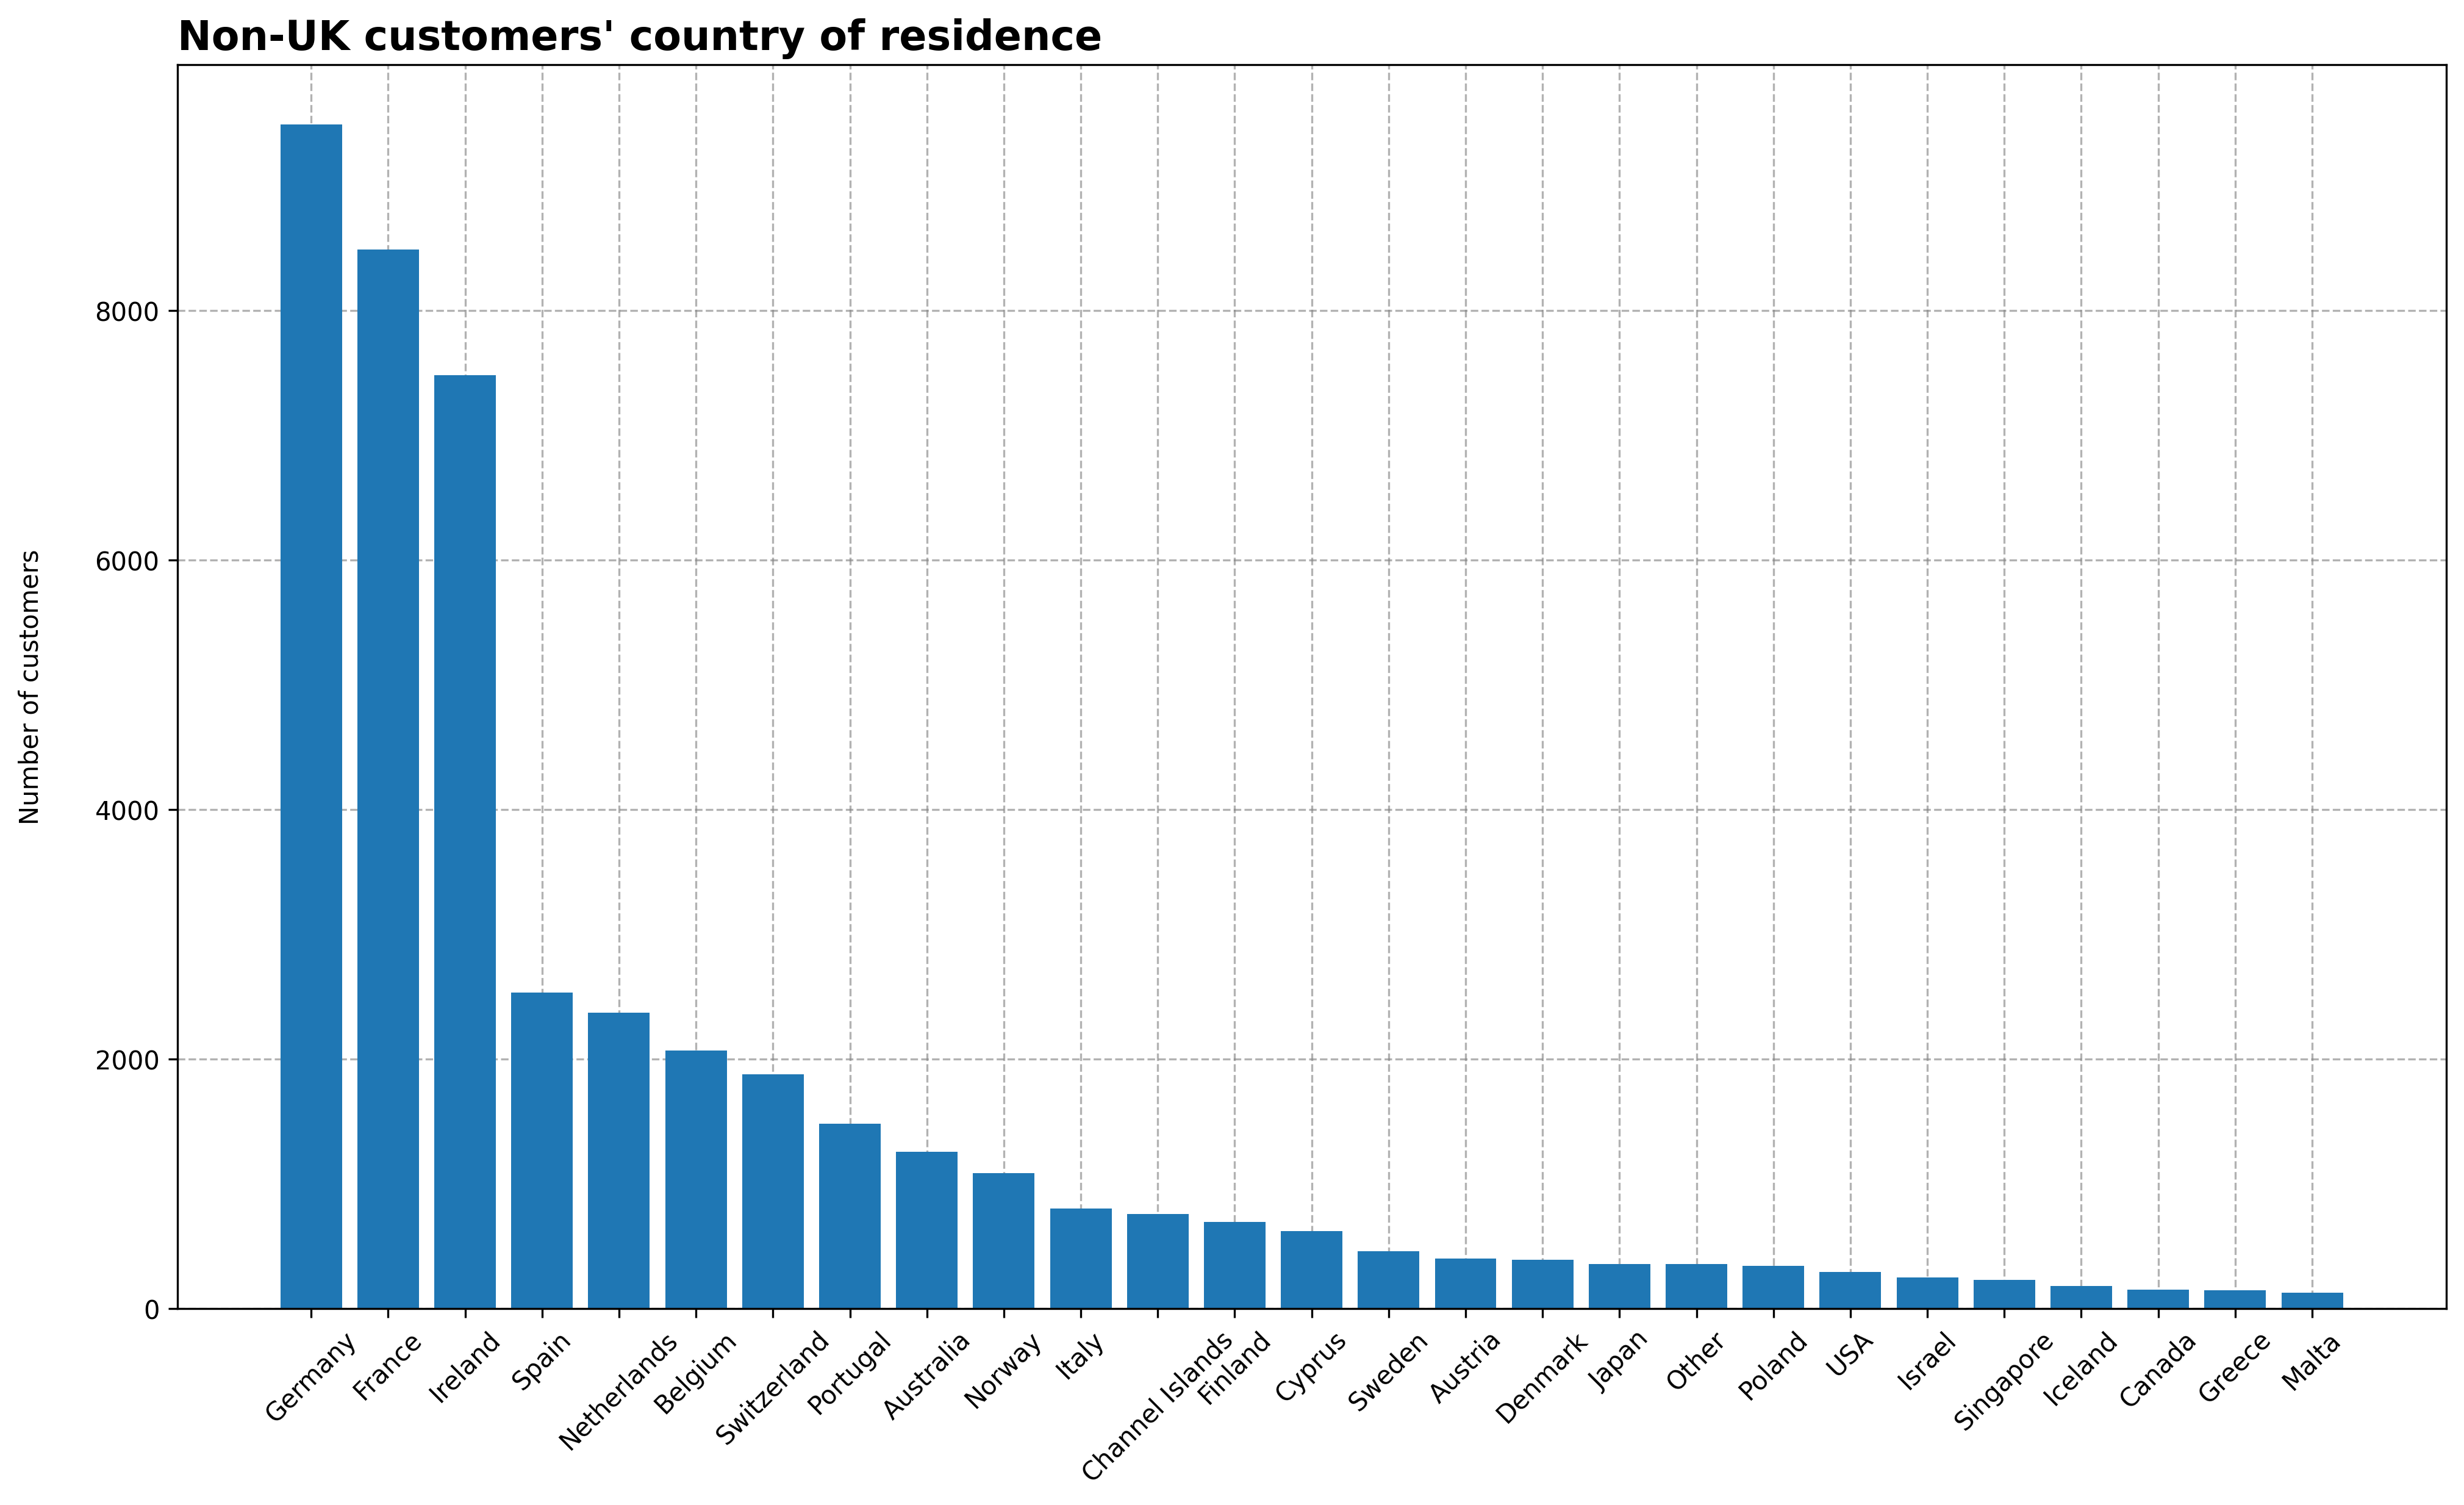

In [14]:
# названия стран x 
# частоты y

x = tab.index
y = tab.values

# график 16 на 9 дюймов
# разрешение 300 точек на дюйм (хорошее)

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

# сама диаграмма bar plot
ax.bar(x, y);

# заголовок с выравниванием по левому краю, 16 полужирный шрифт
ax.set_title("Non-UK customers' country of residence", 
             loc = "left",
             fontsize = 16,
             fontweight = "bold");

# подписи по оси X с поворотом на 45 градусов
ax.tick_params(axis = 'x', 
               labelrotation = 45)

# подпись ко всей оси Y с отступом от оси 20 пунктов
ax.set_ylabel("Number of customers",
              labelpad = 20);

# сетка с прозрачностью 40%
ax.grid(color = 'grey',
        alpha = 0.6,
        linestyle = 'dashed');

# ставим сетку под графиком, 
# чтобы не перечеркивала столбцы

ax.set_axisbelow(True)

# экспортируем график в файл

fig.savefig("sales_barplot.png")